In [1]:
import numpy as np
import pandas as pd
import scipy.fft as fft
import matplotlib.pyplot as plt
from typing import List
%matplotlib inline

#### Util functions

In [2]:
def generate_sine_wave(freq, sample_rate:int, duration:int):
    
    # Generates samples from 0 to duration (time units) with sample_rate samples
    # per time unit (ex Hz)
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    
    return x, y

def generate_signal(frequencies:List[str], sample_rate:int, duration:int, stdev:float=None):
    
    # Generate array of 0's of size sample_rate*duration
    y = np.zeros(sample_rate*duration)
    
    for freq in frequencies:
        
        t, y_tmp = generate_sine_wave(freq, sample_rate, duration)
        y += y_tmp
    
    # Add noise to the signal
    if stdev:
        
        y += np.random.normal(loc=0, scale=stdev, size=len(y))
        
    return t, y


def time_shift_filter(w, n0):
    
    return np.exp(-1j*w*n0)

#### Example 1

In [3]:
sample_rate = 440
duration = 2
frequency = 3

x, y = generate_sine_wave(frequency, sample_rate, duration)

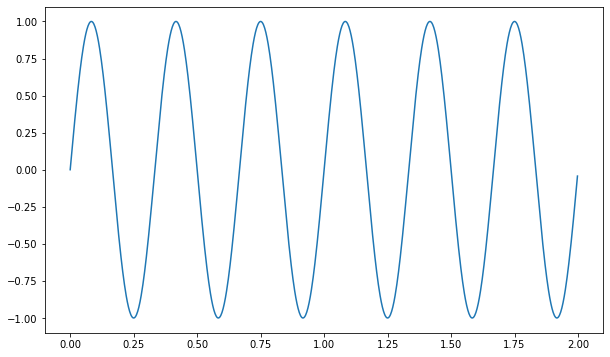

In [4]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x, y)

In [5]:
yf = fft.rfft(y)
xf = fft.rfftfreq(len(y), 1 / sample_rate)

fourier_df = pd.DataFrame({'frequency':xf, 'magnitude':np.abs(yf)}).sort_values('magnitude', ascending=False)
print(fourier_df.shape)
fourier_df.head(10)

(441, 2)


,frequency,magnitude
6,3.0,4.400000e+02
7,3.5,2.943982e-13
5,2.5,2.008073e-13
8,4.0,1.991039e-13
9,4.5,1.547901e-13
22,11.0,1.500742e-13
282,141.0,1.499994e-13
294,147.0,1.489589e-13
266,133.0,1.477771e-13
277,138.5,1.447097e-13


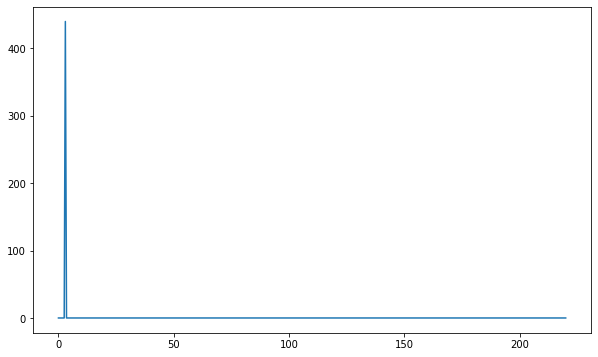

In [8]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(xf, np.abs(yf))

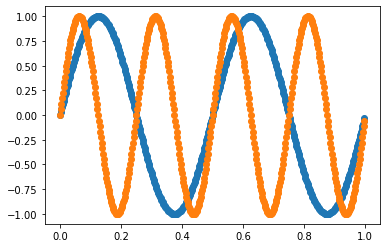

In [22]:
x1, y1 = generate_sine_wave(2, sample_rate, 1)
x2, y2 = generate_sine_wave(4, sample_rate, 1)

plt.scatter(x1, y1)
plt.scatter(x2, y2)

/Users/HarrisonHoffman/Desktop/DataScience/envs/baseprojects/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


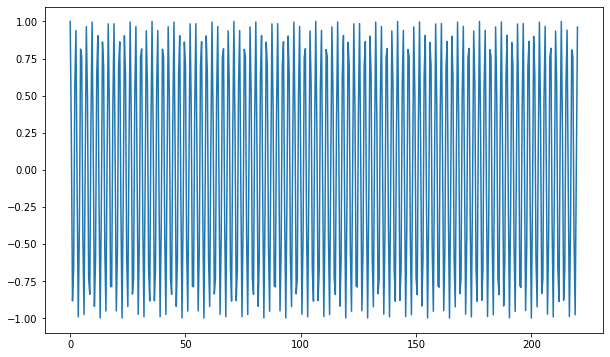

In [9]:
hf = time_shift_filter(xf, 500)

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(xf, hf)

In [10]:
# Convolution theorem
yf_filtered = yf*hf
y_new = fft.irfft(yf_filtered)

/Users/HarrisonHoffman/Desktop/DataScience/envs/baseprojects/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


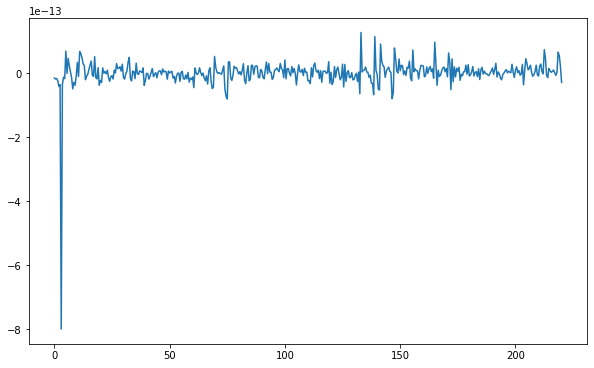

In [11]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(xf, yf)

/Users/HarrisonHoffman/Desktop/DataScience/envs/baseprojects/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


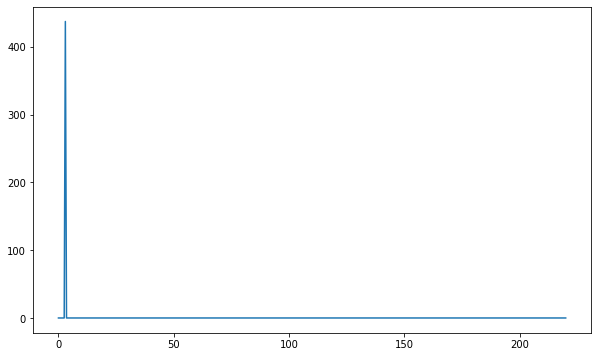

In [13]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(xf, yf_filtered)

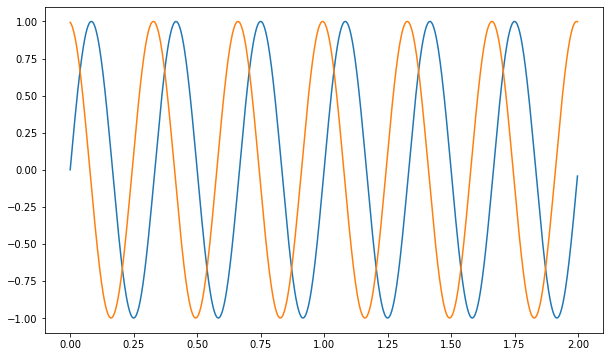

In [14]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(x, y)
ax.plot(x, y_new)